In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('listings.csv')
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,15526,https://www.airbnb.com/rooms/15526,20230630045127,2023-06-30,city scrape,Villa in Solto Collina · ★4.83 · 2 bedrooms · ...,Ideally located on the middle ridge of a panor...,One of the highlights of lake Iseo is Montisol...,https://a0.muscache.com/pictures/miso/Hosting-...,60754,...,4.90,4.76,4.85,CIR: 016200 – CNI -00005,t,5,5,0,0,0.29
1,15542,https://www.airbnb.com/rooms/15542,20230630045127,2023-06-30,city scrape,Villa in Solto Collina · ★4.91 · 1 bedroom · 2...,Ideally located on the middle ridge of a panor...,One of the highlights of lake Iseo is Montisol...,https://a0.muscache.com/pictures/miso/Hosting-...,60754,...,4.96,4.91,4.87,CIR: 016200 – CNI -00005,t,5,5,0,0,0.35
2,31412,https://www.airbnb.com/rooms/31412,20230630045127,2023-06-30,city scrape,Rental unit in Bergamo · ★4.82 · 1 bedroom · 2...,Grazioso ed accogliente appartamento con terra...,NaN,https://a0.muscache.com/pictures/2983581/e5236...,134937,...,4.82,4.70,4.70,NaN,f,11,6,5,0,0.67
3,116423,https://www.airbnb.com/rooms/116423,20230630045127,2023-06-30,city scrape,Rental unit in Bossico · ★4.70 · 2 bedrooms · ...,CIR 016033-CNI-00002T00146<br />In Bossico ci ...,L' Altopiano di Bossico è il paese più bello d...,https://a0.muscache.com/pictures/b9cf855d-8fb5...,588254,...,4.70,4.80,4.90,CIR 016033-CNI-00002T00146,t,3,3,0,0,0.16
4,179345,https://www.airbnb.com/rooms/179345,20230630045127,2023-06-30,city scrape,Rental unit in Bossico · ★4.71 · 1 bedroom · 4...,CIR 016033-CNI-00002T00146<br />Bossico vicino...,Il mio paese (Bossico (BG) è unico perchè è un...,https://a0.muscache.com/pictures/4889df33-54d2...,588254,...,4.59,4.71,4.82,CIR 016033-CNI-00002T00146,t,3,3,0,0,0.27


In [3]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [4]:
columns=['host_is_superhost','neighbourhood_cleansed','property_type','room_type','accommodates','bedrooms',
         'beds','price','minimum_nights','maximum_nights','review_scores_rating','reviews_per_month',
         'instant_bookable','has_availability','calculated_host_listings_count']
data = data[columns]
data.head()

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month,instant_bookable,has_availability,calculated_host_listings_count
0,t,Solto Collina,Entire villa,Entire home/apt,5,2.0,4.0,$125.00,4,28,4.83,0.29,t,t,5
1,t,Solto Collina,Entire villa,Entire home/apt,3,1.0,2.0,$70.00,2,28,4.91,0.35,t,t,5
2,f,Bergamo,Entire rental unit,Entire home/apt,4,1.0,2.0,$69.00,1,31,4.82,0.67,f,t,11
3,t,Bossico,Entire rental unit,Entire home/apt,4,2.0,4.0,$39.00,3,30,4.70,0.16,t,t,3
4,t,Bossico,Entire rental unit,Entire home/apt,4,1.0,4.0,$55.00,3,28,4.71,0.27,t,t,3


In [5]:
data.columns

Index(['host_is_superhost', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'reviews_per_month', 'instant_bookable', 'has_availability',
       'calculated_host_listings_count'],
      dtype='object')

In [6]:
data.shape

(2982, 15)

In [7]:
data.dtypes

host_is_superhost                  object
neighbourhood_cleansed             object
property_type                      object
room_type                          object
accommodates                        int64
bedrooms                          float64
beds                              float64
price                              object
minimum_nights                      int64
maximum_nights                      int64
review_scores_rating              float64
reviews_per_month                 float64
instant_bookable                   object
has_availability                   object
calculated_host_listings_count      int64
dtype: object

In [8]:
data.isna().sum()

host_is_superhost                 668
neighbourhood_cleansed              0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                          616
beds                               29
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating              565
reviews_per_month                 565
instant_bookable                    0
has_availability                    0
calculated_host_listings_count      0
dtype: int64

In [9]:
def handle_missing_data(data,drop=False):
    if drop==True:
        data.dropna(inplace=True)
    else:
        col=data[data.isna()].columns
        for c in col:
            if data[c].dtype == 'object':
                mode_value = data[c].mode()[0]
                data[c].fillna(mode_value, inplace=True)
            elif data[c].dtype == 'int64' or data[c].dtype == 'float64':
                mean_value = data[c].mean()
                data[c].fillna(mean_value, inplace=True)
            elif data[c].dtype == 'bool':
                mode_value = data[c].mode()[0]
                data[c].fillna(mode_value, inplace=True)
handle_missing_data(data)
data.isna().sum()

host_is_superhost                 0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
accommodates                      0
bedrooms                          0
beds                              0
price                             0
minimum_nights                    0
maximum_nights                    0
review_scores_rating              0
reviews_per_month                 0
instant_bookable                  0
has_availability                  0
calculated_host_listings_count    0
dtype: int64

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
accommodates,2982.0,4.002683,2.072809,1.00,2.00,4.000000,5.000000,16.00
bedrooms,2982.0,1.595943,0.757767,1.00,1.00,1.595943,2.000000,12.00
beds,2982.0,2.616322,1.940605,1.00,1.00,2.000000,3.000000,42.00
minimum_nights,2982.0,4.108317,25.380010,1.00,1.00,2.000000,3.000000,1000.00
maximum_nights,2982.0,483.412475,482.016510,1.00,30.00,365.000000,1125.000000,1125.00
review_scores_rating,2982.0,4.732735,0.431931,0.00,4.73,4.790000,4.960000,5.00
reviews_per_month,2982.0,1.380794,1.779152,0.01,0.30,1.000000,1.380794,15.63
calculated_host_listings_count,2982.0,4.032193,5.915283,1.00,1.00,2.000000,4.000000,41.00


In [11]:
data.describe(include='object').transpose()

,count,unique,top,freq
host_is_superhost,2982,2,f,2387
neighbourhood_cleansed,2982,203,Bergamo,1102
property_type,2982,54,Entire rental unit,1254
room_type,2982,4,Entire home/apt,2360
price,2982,308,$60.00,108
instant_bookable,2982,2,f,1592
has_availability,2982,2,t,2930


In [12]:
data[data.duplicated()]

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month,instant_bookable,has_availability,calculated_host_listings_count
897,f,Bergamo,Shared room in rental unit,Shared room,1,1.595943,1.0,$24.00,45,50,4.732735,1.380794,f,f,1
967,f,Dalmine,Private room in bed and breakfast,Private room,3,1.595943,2.0,$90.00,2,15,5.000000,0.090000,f,t,4
1632,f,Ciserano,Entire condo,Entire home/apt,7,3.000000,7.0,$160.00,7,1125,4.732735,1.380794,f,t,5
1697,f,Bergamo,Private room in condo,Private room,1,1.595943,1.0,$18.00,30,1125,5.000000,0.050000,f,t,8
1787,f,Osio Sotto,Private room in bed and breakfast,Private room,1,1.595943,1.0,$81.00,1,365,4.732735,1.380794,t,t,17
2698,f,Predore,Tent,Entire home/apt,4,2.000000,3.0,$117.00,1,365,4.732735,1.380794,t,t,5
2699,f,Predore,Tent,Entire home/apt,4,2.000000,3.0,$117.00,1,365,4.732735,1.380794,t,t,5
2700,f,Predore,Tent,Entire home/apt,4,2.000000,3.0,$117.00,1,365,4.732735,1.380794,t,t,5
2813,f,San Pellegrino Terme,Private room in home,Private room,2,1.595943,1.0,$69.00,1,365,4.732735,1.380794,f,t,3
2873,f,Almenno San Salvatore,Private room in bed and breakfast,Private room,2,1.595943,1.0,$145.00,1,365,4.732735,1.380794,f,t,5


In [13]:
data.drop_duplicates(inplace=True)
data[data.duplicated()]

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month,instant_bookable,has_availability,calculated_host_listings_count


In [14]:
#how many host have superhost ?
data.host_is_superhost.value_counts()

f    2375
t     595
Name: host_is_superhost, dtype: int64

d:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


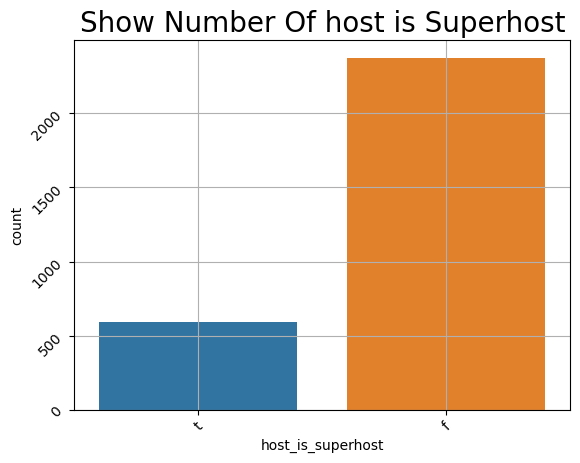

In [15]:
sns.countplot(data.host_is_superhost)
plt.grid(True)
plt.title('Show Number Of host is Superhost',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [16]:
#how many host have availability ?
data.has_availability.value_counts()

t    2919
f      51
Name: has_availability, dtype: int64

d:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


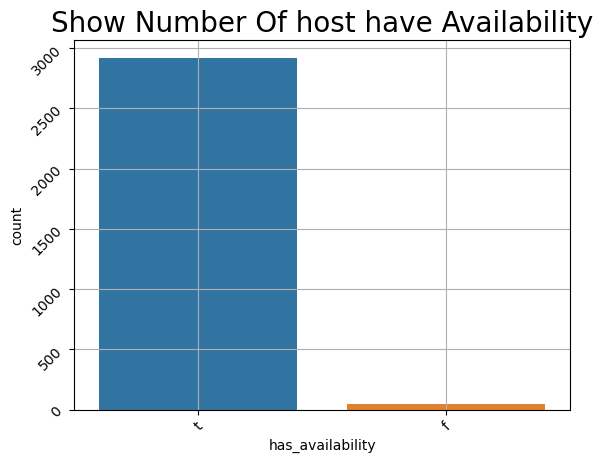

In [17]:
sns.countplot(data.has_availability)
plt.grid(True)
plt.title('Show Number Of host have Availability',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [18]:
#how many host have bookable ?
data.instant_bookable.value_counts()

f    1586
t    1384
Name: instant_bookable, dtype: int64

d:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


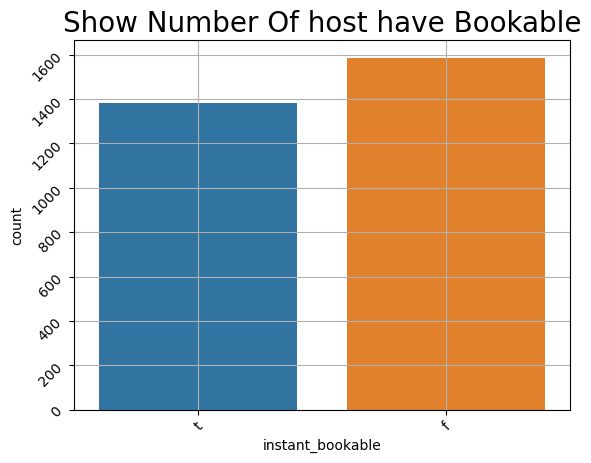

In [19]:
sns.countplot(data.instant_bookable)
plt.grid(True)
plt.title('Show Number Of host have Bookable',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [20]:
#how many host have superhost and availability ?
pd.crosstab(data.host_is_superhost,data.has_availability)

has_availability,f,t
host_is_superhost,,
f,51,2324
t,0,595


d:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


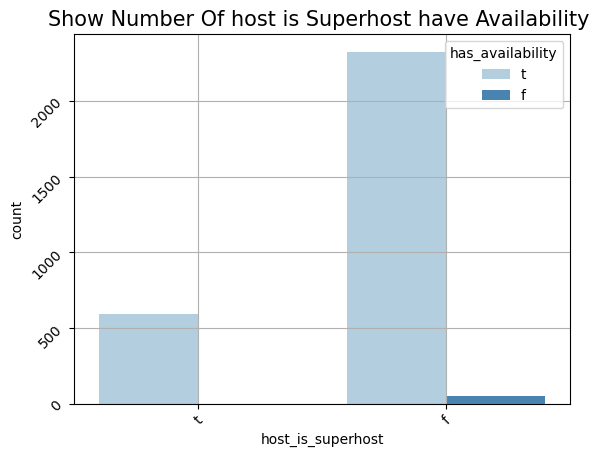

In [21]:
sns.countplot(data.host_is_superhost,hue=data.has_availability,palette='Blues')
plt.grid(True)
plt.title('Show Number Of host is Superhost have Availability ',fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [22]:
#how many host have superhost and bookable ?
pd.crosstab(data.host_is_superhost,data.instant_bookable)

instant_bookable,f,t
host_is_superhost,,
f,1307,1068
t,279,316


d:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


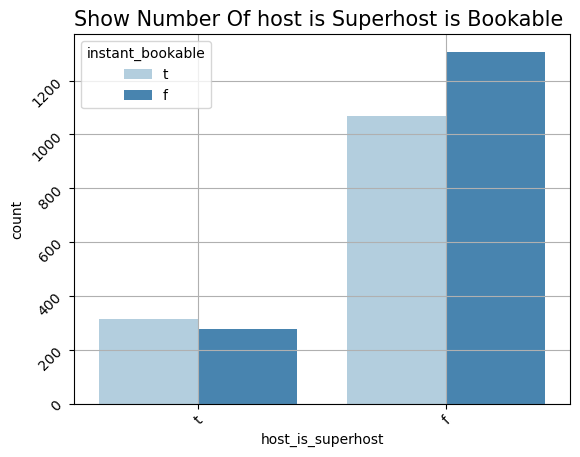

In [23]:
sns.countplot(data.host_is_superhost,hue=data.instant_bookable,palette='Blues')
plt.grid(True)
plt.title('Show Number Of host is Superhost is Bookable ',fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [24]:
#how many host have availability and bookable
pd.crosstab(data.has_availability,data.instant_bookable)

instant_bookable,f,t
has_availability,,
f,51,0
t,1535,1384


d:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


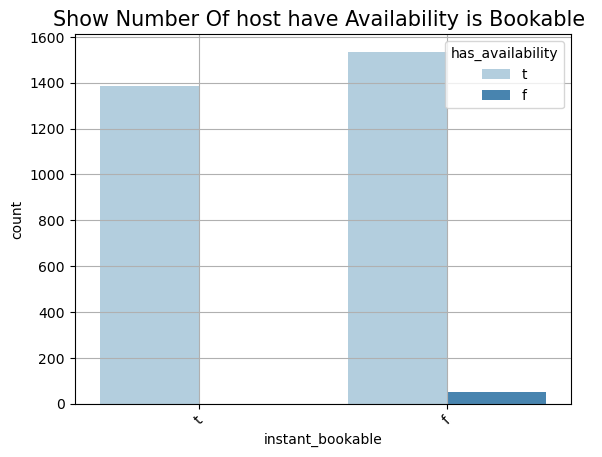

In [25]:
sns.countplot(data.instant_bookable,hue=data.has_availability,palette='Blues')
plt.grid(True)
plt.title('Show Number Of host have Availability is Bookable ',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [26]:
#how many host have superhost,availability and bookable ?
data.groupby(['has_availability','instant_bookable','host_is_superhost'])['host_is_superhost'].count()

has_availability  instant_bookable  host_is_superhost
f                 f                 f                      51
t                 f                 f                    1256
                                    t                     279
                  t                 f                    1068
                                    t                     316
Name: host_is_superhost, dtype: int64

In [27]:
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)
data.price

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14792\15115696.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)


0       125.0
1        70.0
2        69.0
3        39.0
4        55.0
        ...  
2977    300.0
2978    106.0
2979     43.0
2980    180.0
2981    130.0
Name: price, Length: 2970, dtype: float64

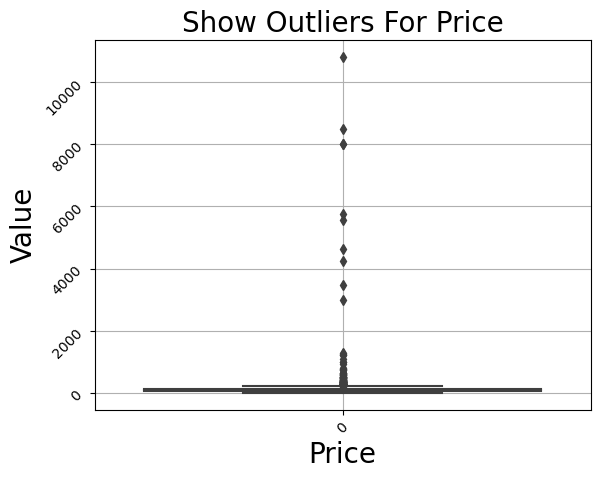

In [28]:
#Show Outliers 
sns.boxplot(data=data.price)
plt.title('Show Outliers For Price',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.xlabel('Price',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [29]:
q75,q25 = np.percentile(data.price,[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
q75 , q25 , intr_qr , max , min 

(120.0, 60.0, 60.0, 210.0, -30.0)

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14792\1149712271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price[data.price>max]=max
C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14792\1149712271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price[data.price<min]=min


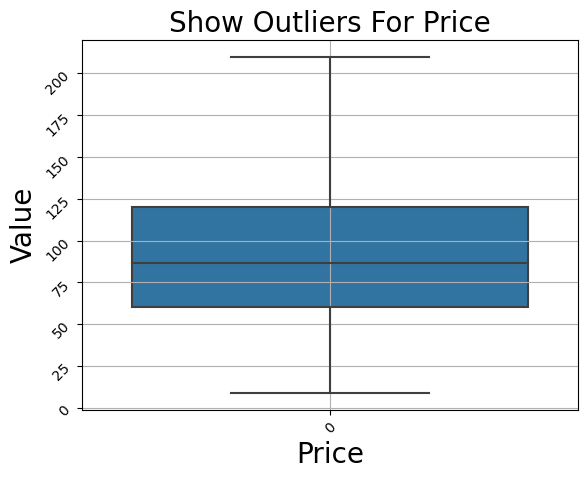

In [30]:
data.price[data.price>max]=max
data.price[data.price<min]=min
#Show outliers 
sns.boxplot(data=data.price)
plt.title('Show Outliers For Price',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.xlabel('Price',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

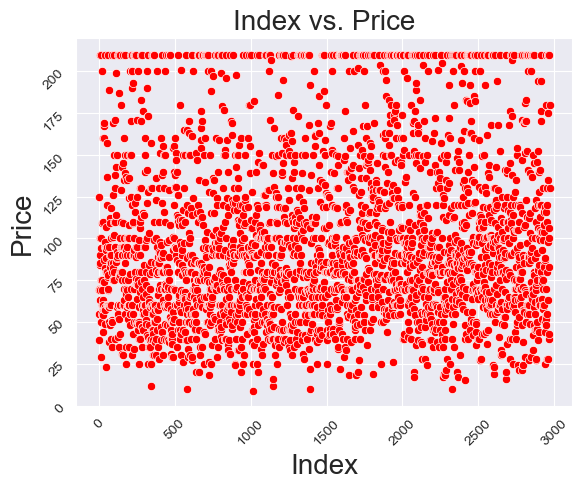

In [31]:
sns.set_style("darkgrid")
sns.scatterplot(x=np.arange(len(data)) , y='price',color='r', data=data)
plt.title("Index vs. Price",fontsize=20)
plt.xlabel('Index',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [32]:
#Show the top 20 values of the property type
data.property_type.value_counts().sort_values(ascending=False).head(20)

Entire rental unit                   1252
Entire condo                          540
Entire home                           218
Private room in bed and breakfast     184
Private room in rental unit           157
Entire vacation home                  130
Private room in condo                  69
Private room in home                   62
Entire villa                           41
Entire cabin                           32
Entire loft                            27
Entire townhouse                       26
Private room in vacation home          21
Room in hotel                          17
Entire cottage                         16
Entire serviced apartment              16
Room in bed and breakfast              15
Private room in villa                  13
Room in boutique hotel                 13
Entire chalet                          10
Name: property_type, dtype: int64

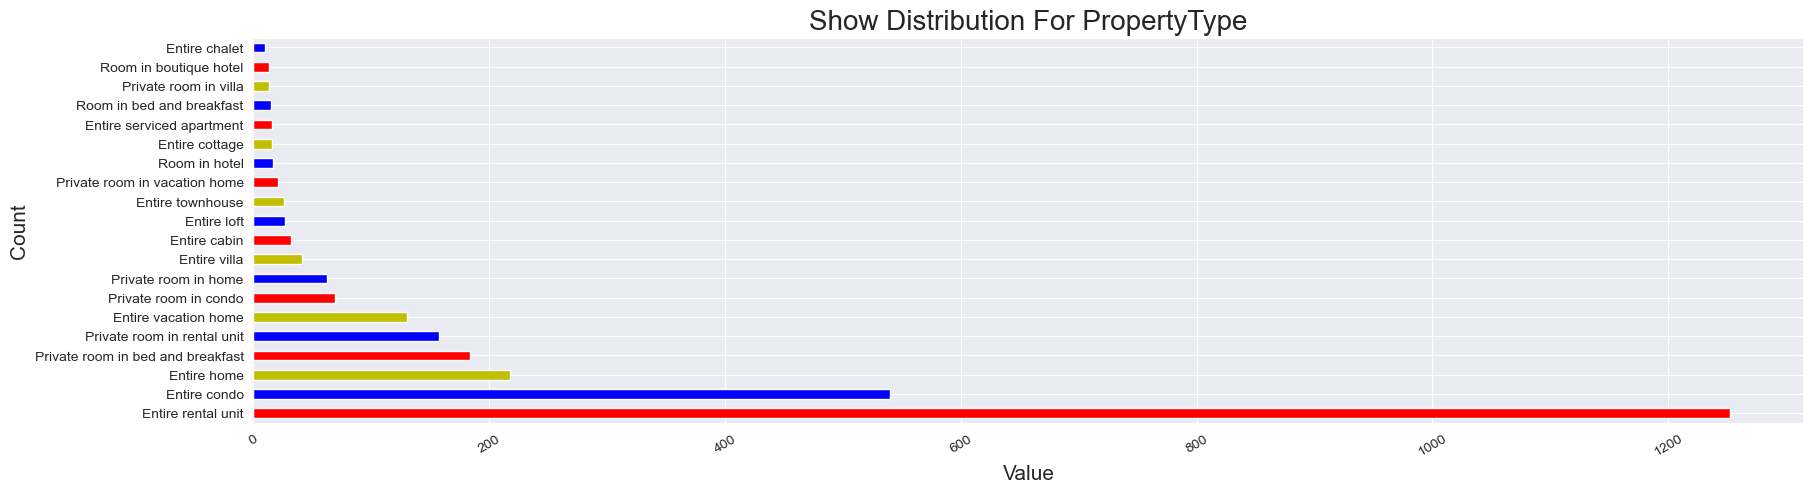

In [33]:
plt.figure(figsize=(20,5))
data.property_type.value_counts().sort_values(ascending=False).head(20).plot.barh(color=['r','b','y'])
plt.title("Show Distribution For PropertyType",fontsize=20)             
plt.ylabel('Count',fontsize=15)
plt.xlabel('Value',fontsize=15)
plt.grid(True)
plt.xticks(rotation=30)
plt.show()

In [34]:
#Show the top 20 values of the neighbourhood
data.neighbourhood_cleansed.value_counts().sort_values(ascending=False).head(20)

Bergamo                     1100
Riva di Solto                102
Lovere                        75
Seriate                       54
Foppolo                       47
Sarnico                       46
Solto Collina                 45
Predore                       45
Parzanica                     43
Castione della Presolana      43
Serina                        37
Clusone                       33
Fonteno                       30
Tavernola Bergamasca          29
Oltre il Colle                27
San Pellegrino Terme          27
Bossico                       26
Osio Sotto                    25
Ranzanico                     24
Sovere                        24
Name: neighbourhood_cleansed, dtype: int64

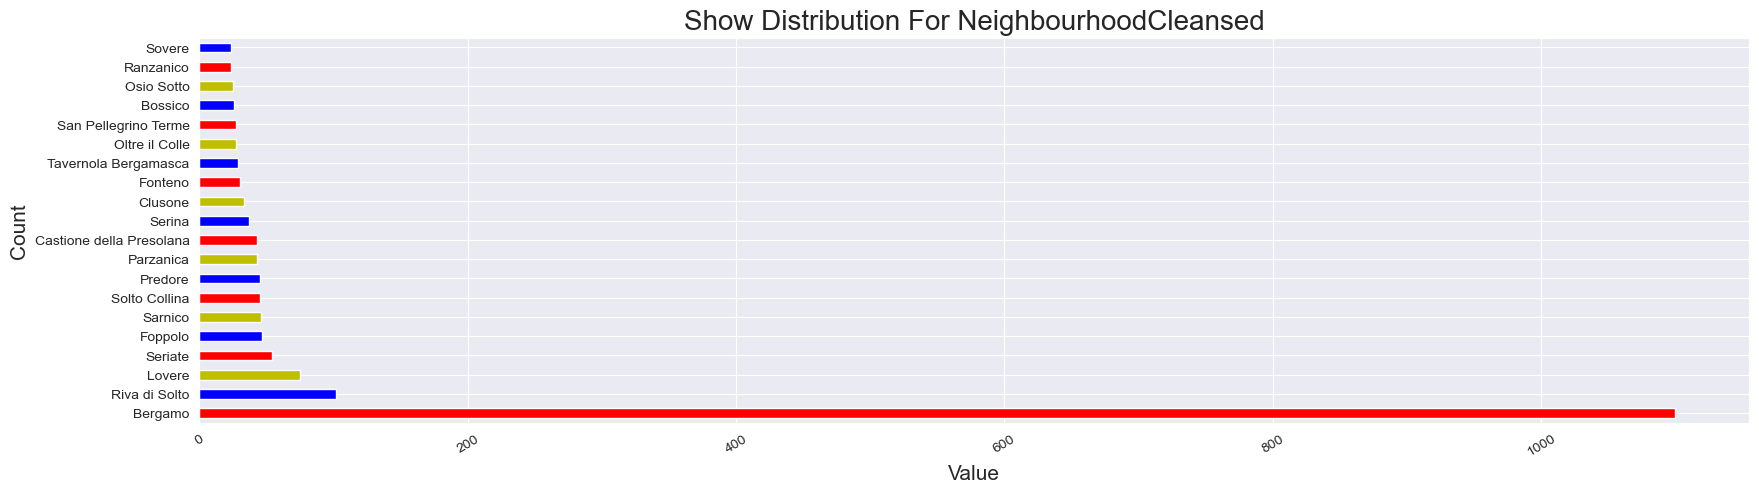

In [35]:
plt.figure(figsize=(20,5))
data.neighbourhood_cleansed.value_counts().sort_values(ascending=False).head(20).plot.barh(color=['r','b','y'])
plt.title("Show Distribution For NeighbourhoodCleansed",fontsize=20)             
plt.ylabel('Count',fontsize=15)
plt.xlabel('Value',fontsize=15)
plt.grid(True)
plt.xticks(rotation=30)
plt.show()

In [36]:
#Show the distrubition of RoomType
data.room_type.value_counts()

Entire home/apt    2354
Private room        571
Hotel room           29
Shared room          16
Name: room_type, dtype: int64

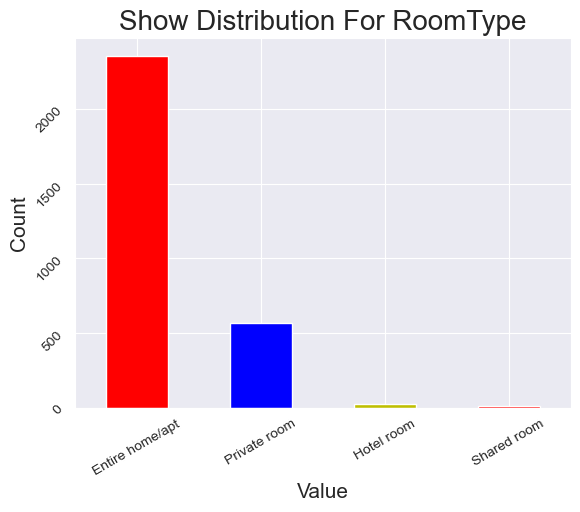

In [37]:
data.room_type.value_counts().plot(kind='bar',color=['r','b','y'])
plt.title("Show Distribution For RoomType",fontsize=20)             
plt.ylabel('Count',fontsize=15)
plt.xlabel('Value',fontsize=15)
plt.grid(True)
plt.xticks(rotation=30)
plt.yticks(rotation=45)
plt.show()

In [38]:
data.beds=data.beds.astype(int)
data.beds.value_counts()

2     884
1     859
3     546
4     359
5     149
6      92
7      29
8      23
10      8
9       7
11      6
12      3
16      1
20      1
37      1
42      1
13      1
Name: beds, dtype: int64

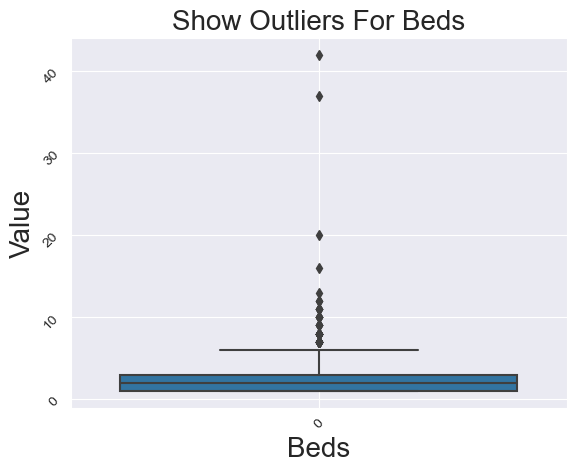

In [39]:
#Show outliers
sns.boxplot(data=data.beds)
plt.title('Show Outliers For Beds',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.xlabel('Beds',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [40]:
q75,q25 = np.percentile(data.beds,[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
q75 , q25 , intr_qr , max , min 

(3.0, 1.0, 2.0, 6.0, -2.0)

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14792\1616604560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.beds[data.beds>max]=max
C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14792\1616604560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.beds[data.beds<min]=min


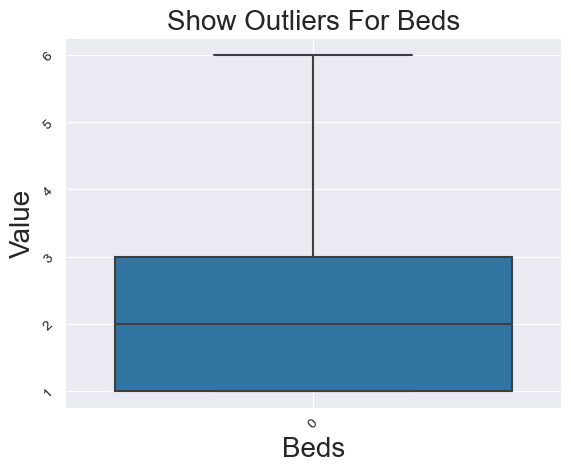

In [41]:
data.beds[data.beds>max]=max
data.beds[data.beds<min]=min
#Show outliers
sns.boxplot(data=data.beds)
plt.title('Show Outliers For Beds',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.xlabel('Beds',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [42]:
data.beds.value_counts()

2    884
1    859
3    546
4    359
6    173
5    149
Name: beds, dtype: int64

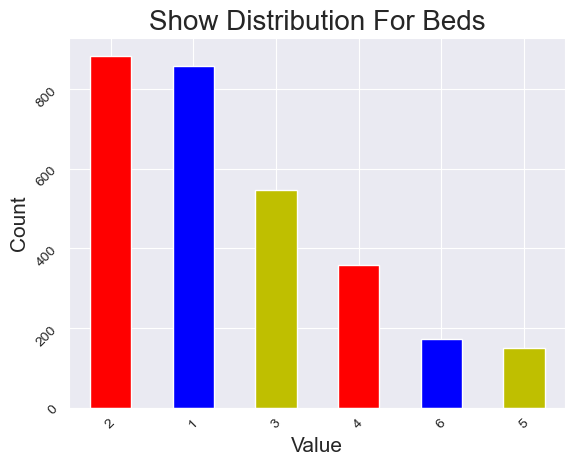

In [43]:
data.beds.value_counts().plot(kind='bar',color=['r','b','y'])
plt.title("Show Distribution For Beds",fontsize=20)             
plt.ylabel('Count',fontsize=15)
plt.xlabel('Value',fontsize=15)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [44]:
data.bedrooms=data.bedrooms.astype(int)
data.bedrooms.value_counts()

1     1915
2      809
3      187
4       41
5        9
6        3
8        2
9        1
12       1
7        1
10       1
Name: bedrooms, dtype: int64

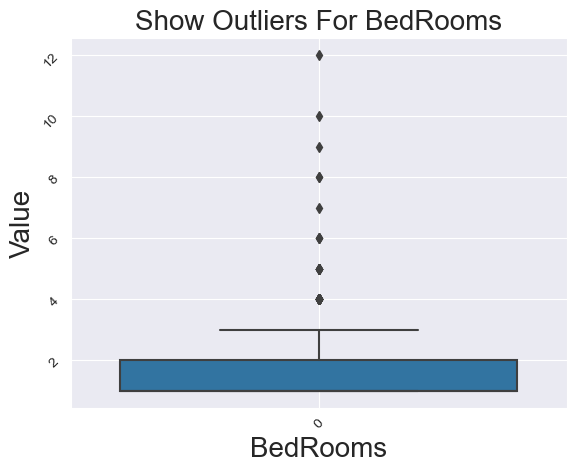

In [45]:
#Show outliers
sns.boxplot(data=data.bedrooms)
plt.title('Show Outliers For BedRooms',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.xlabel('BedRooms',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [46]:
q75,q25 = np.percentile(data.bedrooms,[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
q75 , q25 , intr_qr , max , min 

(2.0, 1.0, 1.0, 3.5, -0.5)

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14792\947326097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.bedrooms[data.bedrooms>max]=max


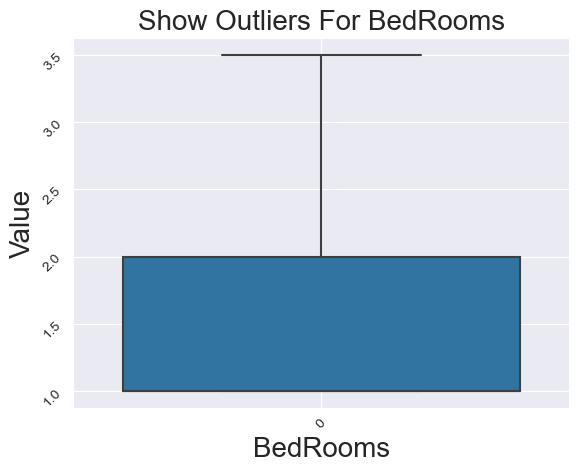

In [47]:
data.bedrooms[data.bedrooms>max]=max
data.bedrooms[data.bedrooms<min]=min
#Show outliers
sns.boxplot(data=data.bedrooms)
plt.title('Show Outliers For BedRooms',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.xlabel('BedRooms',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [48]:
data.bedrooms=data.bedrooms.astype(int)
data.bedrooms.value_counts()

1    1915
2     809
3     246
Name: bedrooms, dtype: int64

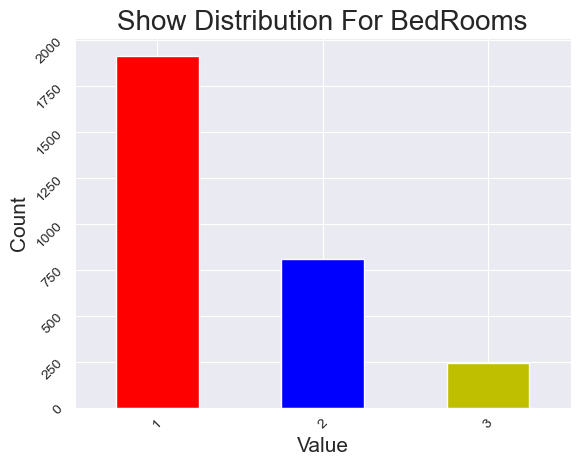

In [49]:
data.bedrooms.value_counts().plot(kind='bar',color=['r','b','y'])
plt.title("Show Distribution For BedRooms",fontsize=20)             
plt.ylabel('Count',fontsize=15)
plt.xlabel('Value',fontsize=15)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [50]:
#how much room accommodates ?
data.accommodates.value_counts()

4     967
2     736
3     336
6     331
5     268
1      93
8      76
7      70
10     27
9      27
12     14
16     12
11      6
14      4
13      3
Name: accommodates, dtype: int64

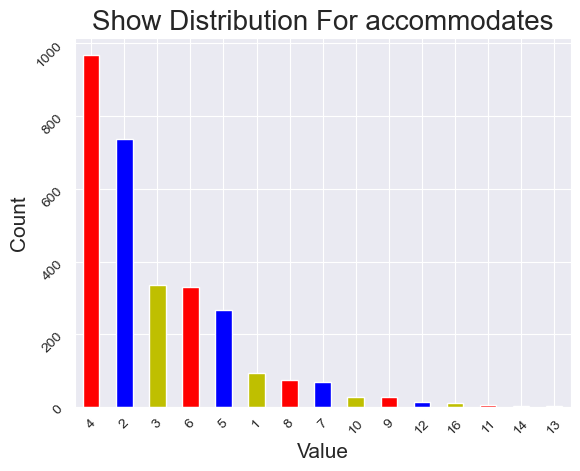

In [51]:
data.accommodates.value_counts().plot(kind='bar',color=['r','b','y'])
plt.title("Show Distribution For accommodates",fontsize=20)             
plt.ylabel('Count',fontsize=15)
plt.xlabel('Value',fontsize=15)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [52]:
#Shows the amount of accommodation in relation to the type of room
pd.crosstab(data.room_type,data.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16
room_type,,,,,,,,,,,,,,,
Entire home/apt,10,393,245,916,254,315,65,74,27,25,5,11,2,3,9
Hotel room,1,17,3,3,2,2,1,0,0,0,0,0,0,0,0
Private room,78,318,86,47,12,14,4,2,0,2,1,3,1,1,2
Shared room,4,8,2,1,0,0,0,0,0,0,0,0,0,0,1


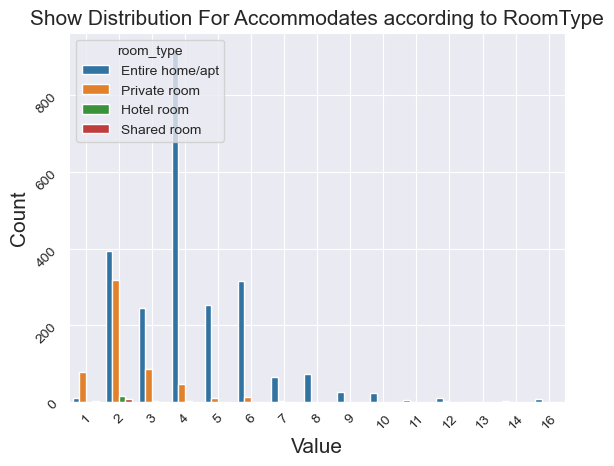

In [53]:
sns.countplot(x=data.accommodates,hue=data.room_type)
plt.title("Show Distribution For Accommodates according to RoomType",fontsize=15)             
plt.ylabel('Count',fontsize=15)
plt.xlabel('Value',fontsize=15)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [54]:
data.minimum_nights.value_counts().sort_values(ascending=False).head(20)

1      1334
2       861
3       368
4        91
7        84
5        73
6        42
30       27
14       22
31       11
15       10
20        9
28        6
365       4
29        4
90        3
10        2
45        2
13        2
12        2
Name: minimum_nights, dtype: int64

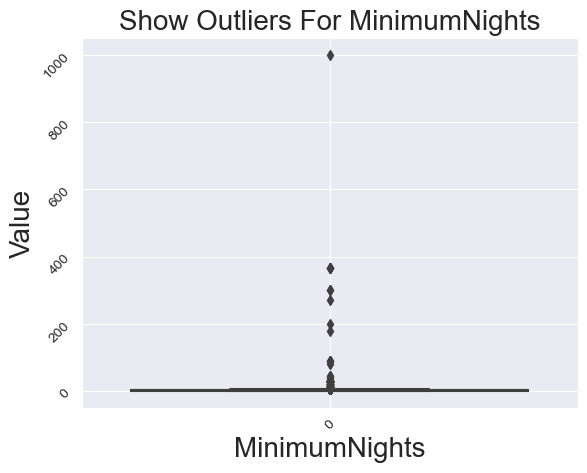

In [55]:
#Show outliers
sns.boxplot(data=data.minimum_nights)
plt.title('Show Outliers For MinimumNights',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.xlabel('MinimumNights',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [56]:
q75,q25 = np.percentile(data.minimum_nights,[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
q75 , q25 , intr_qr , max , min 

(3.0, 1.0, 2.0, 6.0, -2.0)

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14792\4040674004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.minimum_nights[data.minimum_nights>max]=max
C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14792\4040674004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.minimum_nights[data.minimum_nights<min]=min


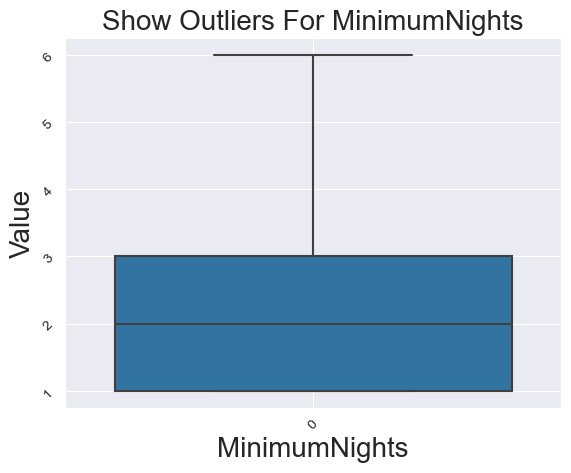

In [57]:
data.minimum_nights[data.minimum_nights>max]=max
data.minimum_nights[data.minimum_nights<min]=min
#Show outliers
sns.boxplot(data=data.minimum_nights)
plt.title('Show Outliers For MinimumNights',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.xlabel('MinimumNights',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [58]:
data.minimum_nights.value_counts()

1    1334
2     861
3     368
6     243
4      91
5      73
Name: minimum_nights, dtype: int64

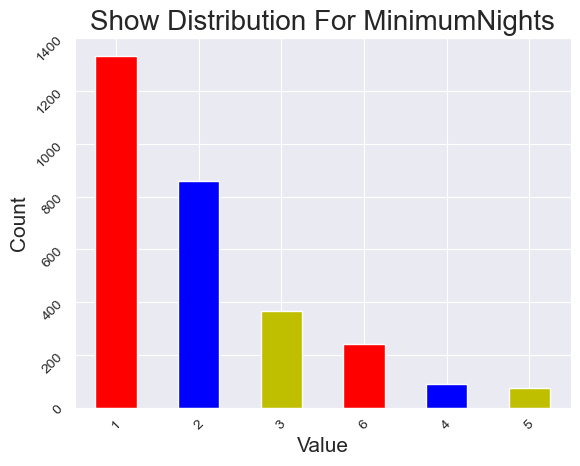

In [59]:
data.minimum_nights.value_counts().plot(kind='bar',color=['r','b','y'])
plt.title("Show Distribution For MinimumNights",fontsize=20)             
plt.ylabel('Count',fontsize=15)
plt.xlabel('Value',fontsize=15)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [60]:
data.maximum_nights.value_counts().sort_values(ascending=False).head(20)

1125    1003
365      641
30       412
28       223
29       160
15        69
60        50
90        47
7         42
14        42
10        35
20        27
31        25
180       18
5         18
21        16
120       12
100       11
1124      11
25         8
Name: maximum_nights, dtype: int64

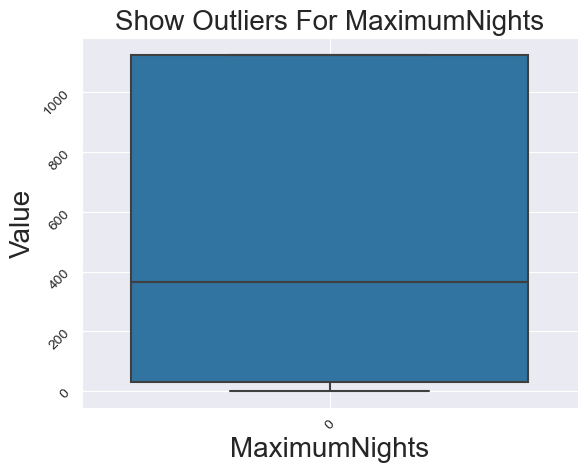

In [61]:
#Show outliers
sns.boxplot(data=data.maximum_nights)
plt.title('Show Outliers For MaximumNights',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.xlabel('MaximumNights',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

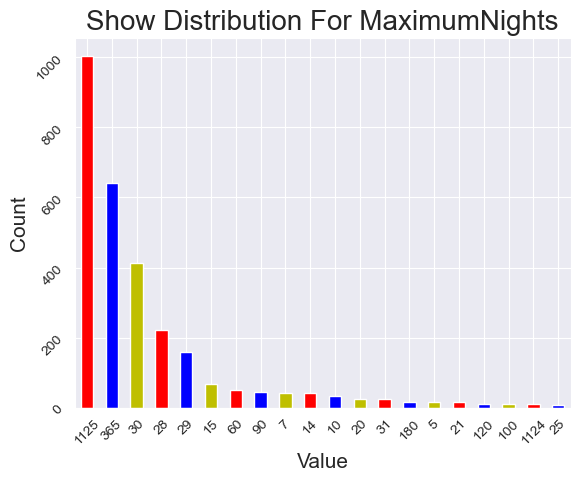

In [62]:
data.maximum_nights.value_counts().sort_values(ascending=False).head(20).plot(kind='bar',color=['r','b','y'])
plt.title("Show Distribution For MaximumNights",fontsize=20)             
plt.ylabel('Count',fontsize=15)
plt.xlabel('Value',fontsize=15)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [63]:
data.review_scores_rating.value_counts()

5.000000    645
4.732735    555
4.500000    101
4.670000     75
4.860000     65
           ... 
4.470000      1
3.890000      1
4.310000      1
4.410000      1
4.200000      1
Name: review_scores_rating, Length: 101, dtype: int64

In [64]:
#max
np.max(data.review_scores_rating)

5.0

In [65]:
#min
np.min(data.review_scores_rating)

0.0

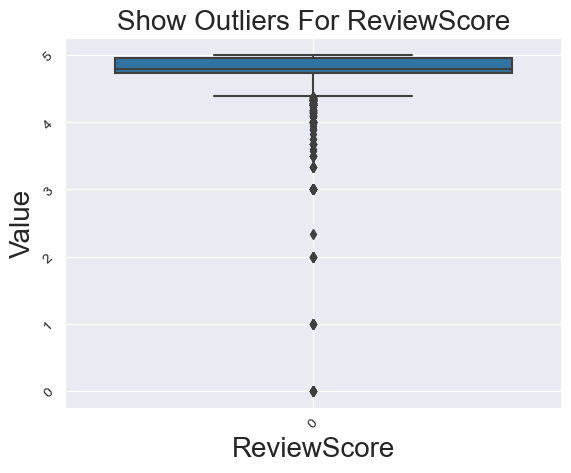

In [66]:
#Show outliers
sns.boxplot(data=data.review_scores_rating)
plt.title('Show Outliers For ReviewScore',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.xlabel('ReviewScore',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [67]:
q75,q25 = np.percentile(data.review_scores_rating,[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
q75 , q25 , intr_qr , max , min 

(4.96, 4.73, 0.22999999999999954, 5.305, 4.385000000000002)

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14792\1580997205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.review_scores_rating[data.review_scores_rating>max]=max
C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14792\1580997205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.review_scores_rating[data.review_scores_rating<min]=min


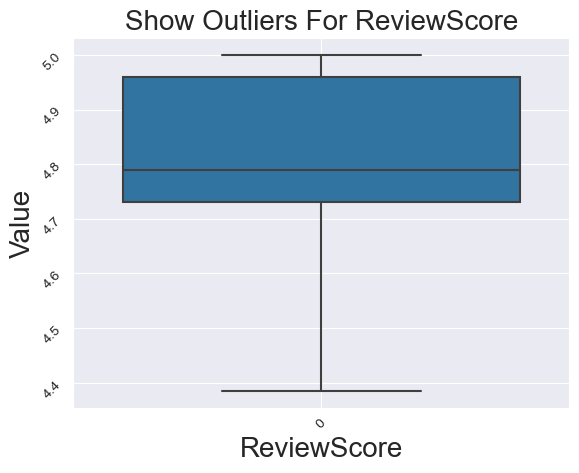

In [68]:
data.review_scores_rating[data.review_scores_rating>max]=max
data.review_scores_rating[data.review_scores_rating<min]=min
#Show outliers
sns.boxplot(data=data.review_scores_rating)
plt.title('Show Outliers For ReviewScore',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.xlabel('ReviewScore',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [69]:
data.review_scores_rating.value_counts().sort_values(ascending=False).head(20)

5.000000    645
4.732735    555
4.385000    227
4.500000    101
4.670000     75
4.860000     65
4.880000     63
4.900000     63
4.750000     59
4.830000     59
4.800000     50
4.850000     45
4.890000     45
4.940000     44
4.950000     43
4.910000     42
4.920000     40
4.930000     38
4.970000     36
4.710000     34
Name: review_scores_rating, dtype: int64

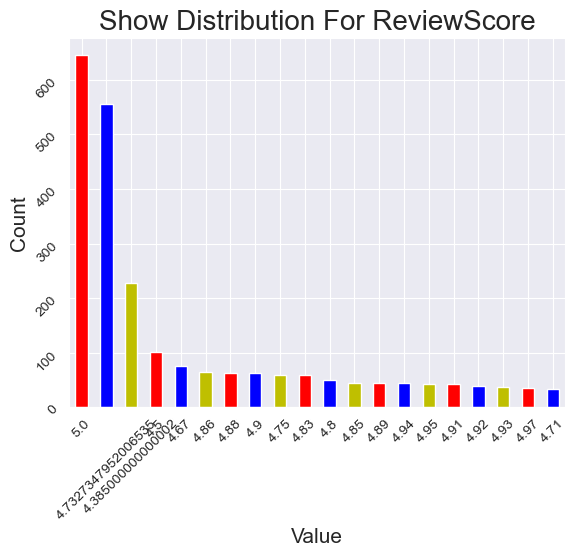

In [70]:
data.review_scores_rating.value_counts().sort_values(ascending=False).head(20).plot(kind='bar',color=['r','b','y'])
plt.title("Show Distribution For ReviewScore",fontsize=20)             
plt.ylabel('Count',fontsize=15)
plt.xlabel('Value',fontsize=15)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [71]:
data.reviews_per_month.value_counts().sort_values(ascending=False).head(20)

1.380794    555
0.090000     54
1.000000     47
0.170000     43
0.020000     39
0.080000     35
0.040000     34
0.050000     34
0.100000     34
0.160000     28
0.190000     28
0.130000     28
0.180000     26
0.060000     26
0.070000     26
2.000000     25
0.030000     23
0.150000     23
0.120000     23
0.230000     22
Name: reviews_per_month, dtype: int64

In [72]:
#max
np.max(data.reviews_per_month)

15.63

In [73]:
#min
np.min(data.reviews_per_month)

0.01

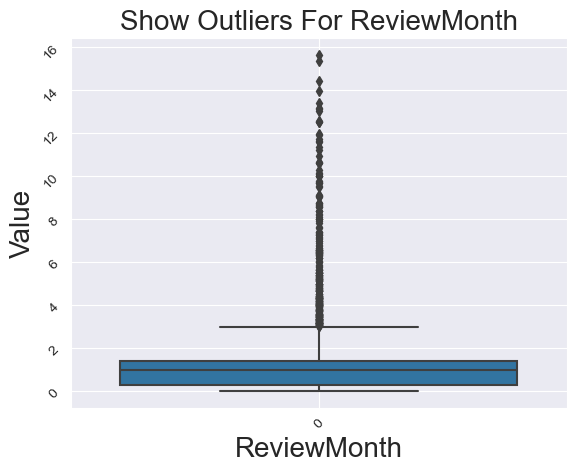

In [74]:
#Show outliers
sns.boxplot(data=data.reviews_per_month)
plt.title('Show Outliers For ReviewMonth',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.xlabel('ReviewMonth',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [75]:
q75,q25 = np.percentile(data.reviews_per_month,[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
q75 , q25 , intr_qr , max , min 

(1.380794373189904,
 0.3,
 1.080794373189904,
 3.00198593297476,
 -1.3211915597848558)

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14792\939435355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.reviews_per_month[data.reviews_per_month>max]=max
C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14792\939435355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.reviews_per_month[data.reviews_per_month<min]=min


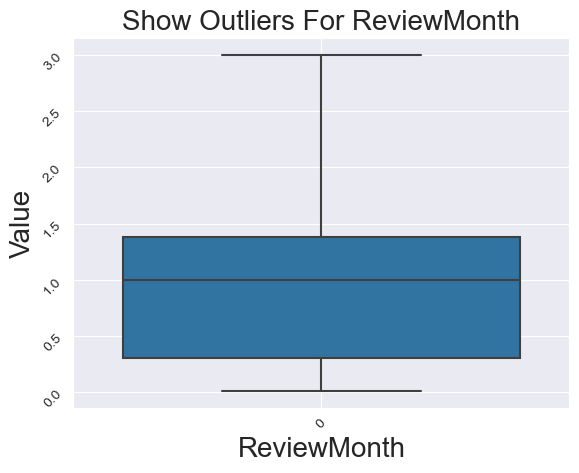

In [76]:
data.reviews_per_month[data.reviews_per_month>max]=max
data.reviews_per_month[data.reviews_per_month<min]=min
#Show outliers
sns.boxplot(data=data.reviews_per_month)
plt.title('Show Outliers For ReviewMonth',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.xlabel('ReviewMonth',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [77]:
data.reviews_per_month.value_counts().sort_values(ascending=False).head(20)

1.380794    555
3.001986    292
0.090000     54
1.000000     47
0.170000     43
0.020000     39
0.080000     35
0.040000     34
0.100000     34
0.050000     34
0.190000     28
0.160000     28
0.130000     28
0.060000     26
0.070000     26
0.180000     26
2.000000     25
0.030000     23
0.120000     23
0.150000     23
Name: reviews_per_month, dtype: int64

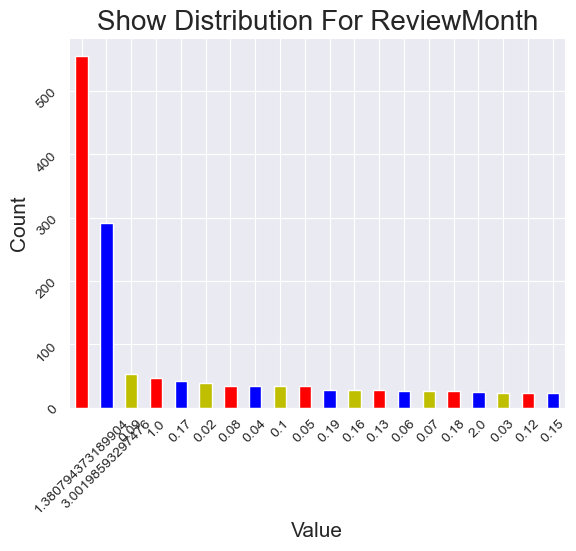

In [78]:
data.reviews_per_month.value_counts().sort_values(ascending=False).head(20).plot(kind='bar',color=['r','b','y'])
plt.title("Show Distribution For ReviewMonth",fontsize=20)             
plt.ylabel('Count',fontsize=15)
plt.xlabel('Value',fontsize=15)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [79]:
data.calculated_host_listings_count.value_counts()

1     1313
2      456
3      278
4      199
5      155
7       98
6       84
9       72
19      56
11      44
41      41
8       39
10      29
14      28
18      18
16      16
17      16
15      15
13      13
Name: calculated_host_listings_count, dtype: int64

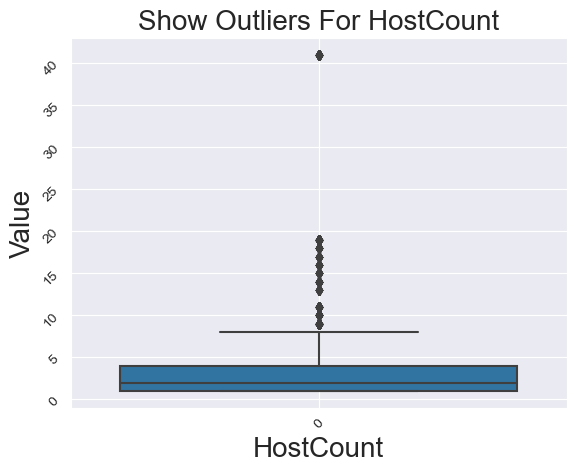

In [80]:
#Show outliers
sns.boxplot(data=data.calculated_host_listings_count)
plt.title('Show Outliers For HostCount',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.xlabel('HostCount',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [81]:
q75,q25 = np.percentile(data.calculated_host_listings_count,[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
q75 , q25 , intr_qr , max , min 

(4.0, 1.0, 3.0, 8.5, -3.5)

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14792\3522060720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.calculated_host_listings_count[data.calculated_host_listings_count>max]=max


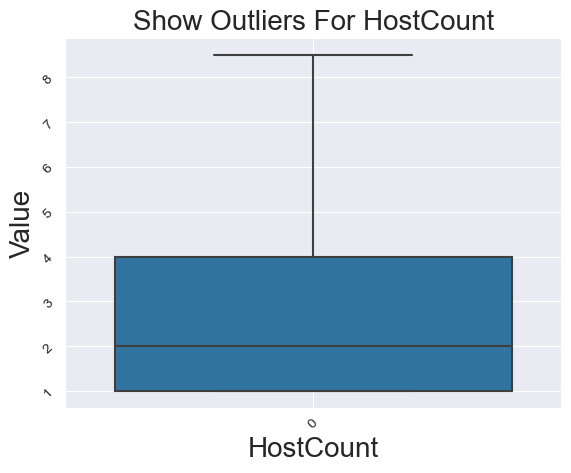

In [82]:
data.calculated_host_listings_count[data.calculated_host_listings_count>max]=max
data.calculated_host_listings_count[data.calculated_host_listings_count<min]=min
#Show outliers
sns.boxplot(data=data.calculated_host_listings_count)
plt.title('Show Outliers For HostCount',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.xlabel('HostCount',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [83]:
data.calculated_host_listings_count.value_counts()

1.0    1313
2.0     456
8.5     348
3.0     278
4.0     199
5.0     155
7.0      98
6.0      84
8.0      39
Name: calculated_host_listings_count, dtype: int64

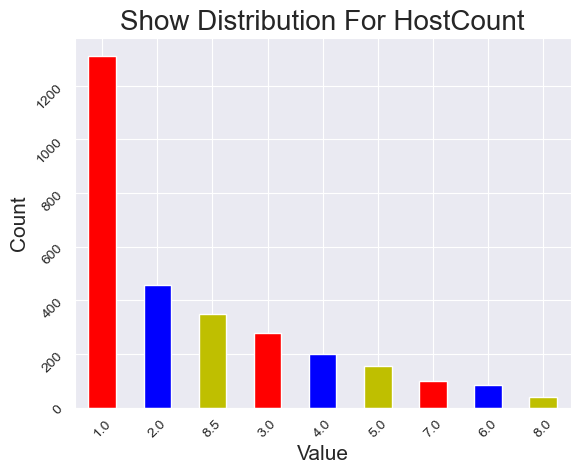

In [84]:
data.calculated_host_listings_count.value_counts().plot(kind='bar',color=['r','b','y'])
plt.title("Show Distribution For HostCount",fontsize=20)             
plt.ylabel('Count',fontsize=15)
plt.xlabel('Value',fontsize=15)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month,calculated_host_listings_count
accommodates,1.000000,0.639759,0.754956,0.394312,0.055035,0.038406,0.001132,-0.120204,-0.034733
bedrooms,0.639759,1.000000,0.642461,0.383958,0.143990,0.010442,0.005125,-0.146046,-0.054400
beds,0.754956,0.642461,1.000000,0.289891,0.139007,0.055058,-0.007318,-0.152281,-0.110313
price,0.394312,0.383958,0.289891,1.000000,-0.119055,-0.018824,0.035338,-0.104536,0.241690
minimum_nights,0.055035,0.143990,0.139007,-0.119055,1.000000,0.013580,-0.021593,-0.237538,-0.139437
maximum_nights,0.038406,0.010442,0.055058,-0.018824,0.013580,1.000000,-0.079567,-0.132964,0.059901
review_scores_rating,0.001132,0.005125,-0.007318,0.035338,-0.021593,-0.079567,1.000000,0.042449,-0.162268
reviews_per_month,-0.120204,-0.146046,-0.152281,-0.104536,-0.237538,-0.132964,0.042449,1.000000,-0.018061
calculated_host_listings_count,-0.034733,-0.054400,-0.110313,0.241690,-0.139437,0.059901,-0.162268,-0.018061,1.000000


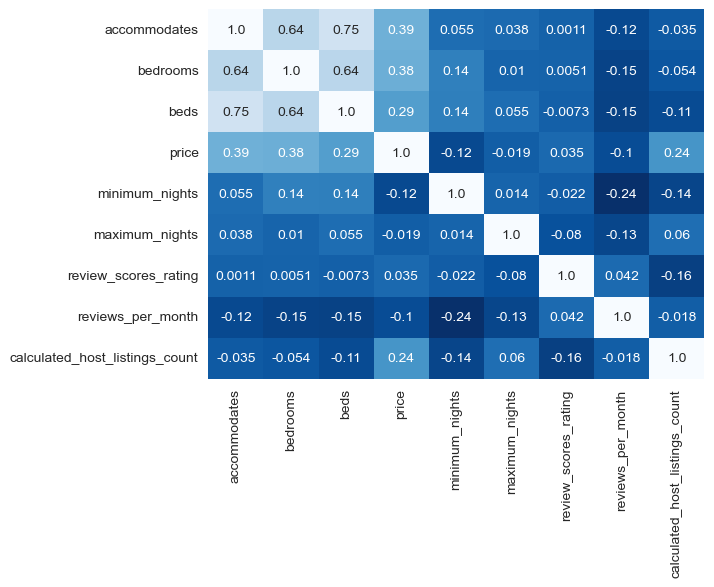

In [85]:
sns.heatmap(data.corr(),annot=True,fmt='.2',cbar=False,cmap='Blues_r')
data.corr()